# Prévision du cours des actions à l'aide d'ARIMA et de LSTM

La prévision des prix des actions est l'un des sujets les plus populaires en finance, en raison de son impact potentiel sur la prise de décision pour les investisseurs et les gestionnaires de portefeuille. Avec l'augmentation de la disponibilité des données de marché et des progrès des algorithmes d'apprentissage profond, les modèles d'apprentissage profond, tels que le LSTM (Long Short-Term Memory), ont gagné en popularité pour leur capacité à capturer des relations complexes et des dépendances à long terme dans les séries temporelles financières.

Dans ce projet, nous allons explorer l'utilisation d'un modèle LSTM pour prédire les prix futurs de l'action APPLE. LSTM est un type de réseau de neurones récurrents (RNN) spécialement conçu pour traiter des séquences de données, ce qui en fait un excellent choix pour les séries temporelles. Nous utiliserons les données historiques du cours de l'action APPLE pour entraîner notre modèle et évaluer sa performance.

## Objectifs du Projet

Les objectifs principaux de ce projet sont les suivants :

1. **Prétraitement des Données :** Charger et nettoyer les données de stock APPLE, en normalisant les valeurs et en créant des ensembles de données de formation et de test.
2. **Construction du Modèle LSTM :** Construire et configurer un modèle LSTM pour apprendre les motifs dans les données de cours boursiers.
3. **Entraînement et Évaluation :** Entraîner le modèle sur les données historiques et évaluer ses performances en utilisant les mesures d'erreur courantes pour les séries temporelles, telles que RMSE et MAE.
4. **Visualisation des Prédictions :** Comparer les prédictions du modèle avec les valeurs réelles et visualiser les résultats pour évaluer la qualité de la prévision.

## Méthodologie

1. **Chargement des Données :** Importation des données d'APPLE stock (souvent disponibles via des API financières ou des sources de données publiques) et exploration des colonnes, qui incluent généralement les prix de clôture, ouverture, haut, bas et volume des transactions.
2. **Prétraitement des Données :** Transformation des données pour s'assurer de leur compatibilité avec le modèle LSTM, notamment en normalisant les valeurs et en créant des séquences de données.
3. **Construction et Entraînement du Modèle :** Création d'un modèle LSTM dans TensorFlow ou Keras et entraînement du modèle sur les séquences de données.
4. **Évaluation et Interprétation :** Analyse des résultats pour évaluer la précision du modèle et interprétation des résultats dans le contexte financier.



## Chargement des packages

In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.6 MB/s eta 0:00:00


In [45]:
import math
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from statsmodels.tsa.stattools import adfuller
import matplotlib.dates as mdates

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [3]:

import statsmodels.api as sm

## Chargement de la base de données

In [4]:
# Définir la période de temps
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2020, 6, 22)

# Télécharger les données d'Apple (AAPL)
df = yf.download("AAPL", start=start, end=end)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03 00:00:00+00:00,12.402626,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04 00:00:00+00:00,12.469282,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05 00:00:00+00:00,12.607715,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06 00:00:00+00:00,12.739511,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09 00:00:00+00:00,12.719307,15.061786,15.276786,15.048214,15.196429,394024400


In [5]:
print(df.shape)

(2130, 6)


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2130 entries, 2012-01-03 00:00:00+00:00 to 2020-06-19 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2130 non-null   float64
 1   (Close, AAPL)      2130 non-null   float64
 2   (High, AAPL)       2130 non-null   float64
 3   (Low, AAPL)        2130 non-null   float64
 4   (Open, AAPL)       2130 non-null   float64
 5   (Volume, AAPL)     2130 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 116.5 KB


In [7]:
# stat des
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2.130000e+03
mean,31.623054,34.085149,34.396924,33.745190,34.063345,2.343129e+08
std,16.042952,15.853275,16.013194,15.646476,15.801780,1.835641e+08
min,11.952169,13.947500,14.271429,13.753571,13.856071,4.544800e+07
25%,18.728786,21.926785,22.141607,21.648661,21.989285,1.108503e+08
50%,26.279385,28.901250,29.185000,28.701250,28.981250,1.693016e+08
75%,41.061153,43.492500,43.745001,43.023751,43.399376,2.902977e+08
max,86.047607,88.209999,89.139999,87.772499,88.787498,1.506120e+09


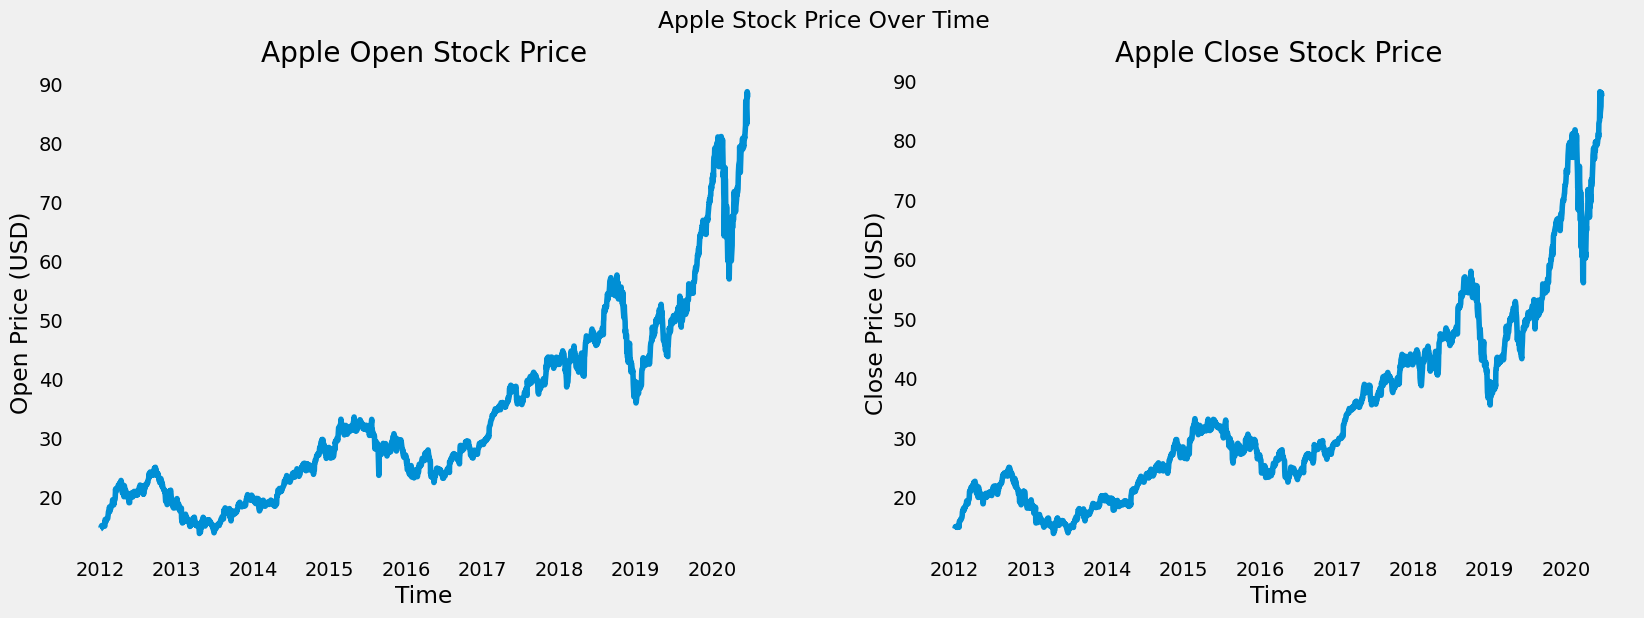

In [8]:
# Trace les prix d'ouverture et de fermeture
plt.figure(figsize=(18,6))

# Sous-graphe pour le prix d'ouverture
plt.subplot(1,2,1)
plt.plot(df.index, df["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("Apple Open Stock Price")
plt.grid()

# Sous-graphe pour le prix de fermeture
plt.subplot(1,2,2)
plt.plot(df.index, df["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("Apple Close Stock Price")
plt.grid()

# Titre général
plt.suptitle("Apple Stock Price Over Time")
plt.show()


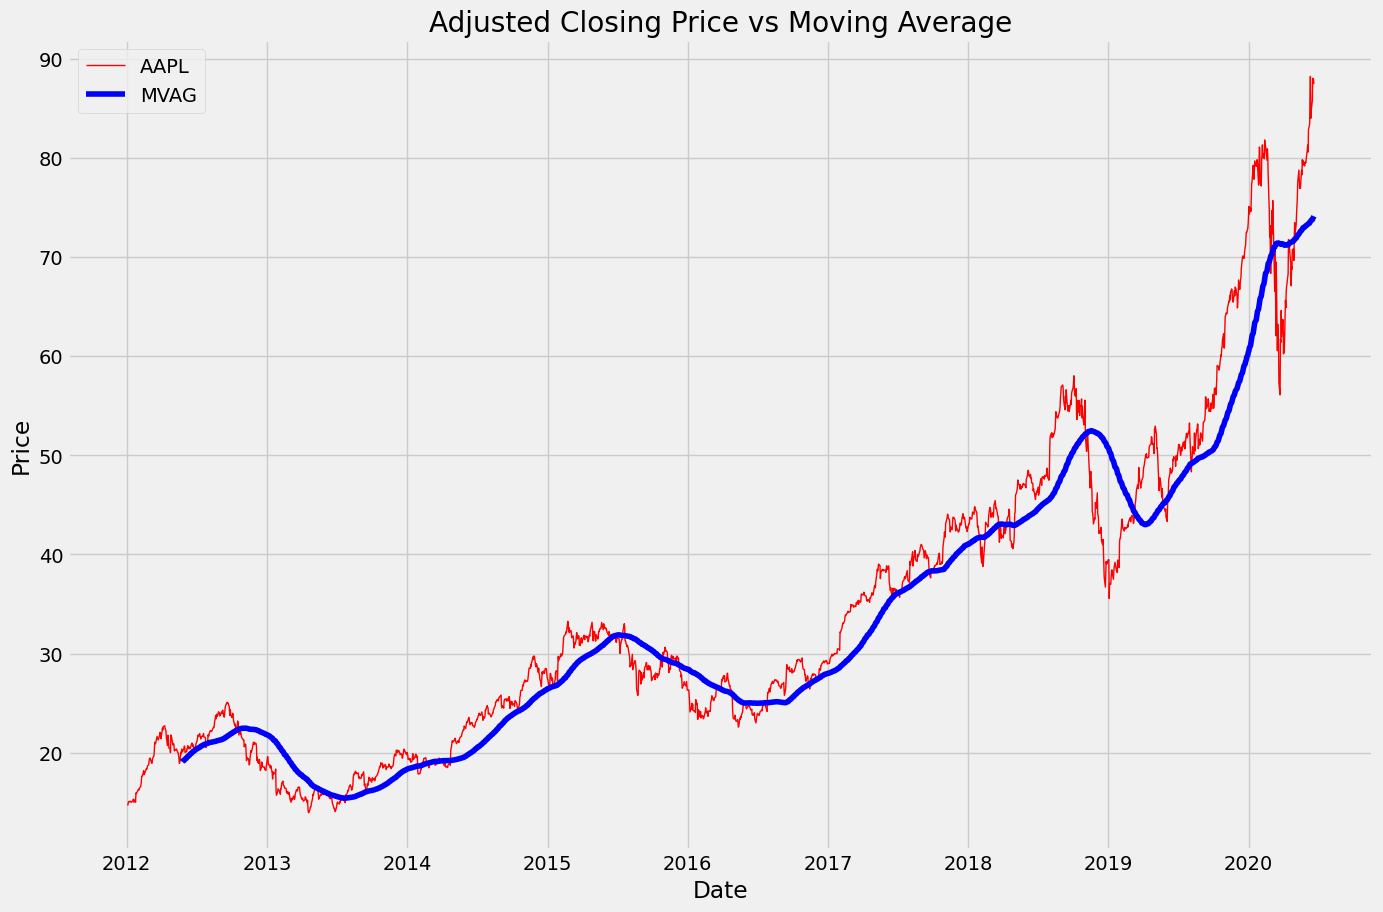

In [47]:
# Calculez la moyenne mobile
close_col = df['Close']
mvag = close_col.rolling(window=100).mean()

# Affichage des courbes
plt.figure(figsize=(15, 10))
plt.plot(df['Close'], label='AAPL', color='red', linewidth=1.0)
plt.plot(mvag, label='MVAG', color='blue')

# Personnalisation du graphique
plt.title('Adjusted Closing Price vs Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()




## Preprocessing

### URT

In [9]:
def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

test_result = adfuller(df['Close'])
adfuller_test(df['Close'])

ADF Test Statistics : 1.0034843794766644
p-value : 0.9943025770874632
#Lags Used : 26
Number of Observations Used : 2103
Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary


In [10]:
df['Close_shift'] = df['Close'] - df['Close'].shift(1)
df['Close_shift'] = df['Close_shift'].fillna(method='bfill')
test_result = adfuller(df['Close_shift'])
adfuller_test(df['Close_shift'])

<ipython-input-10-99824c3dc420>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close_shift'] = df['Close_shift'].fillna(method='bfill')


ADF Test Statistics : -7.85347082511877
p-value : 5.521627882381839e-12
#Lags Used : 25
Number of Observations Used : 2104
Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary


In [11]:
# Define selected features and target attribute
features = ["Open", "High", "Low",	"Close", "Adj Close", "Volume"]
target = "Close"

In [31]:
# Définir les indices de séparation pour chaque ensemble
n_obs = len(df)
train_size = int(n_obs * 0.85)
validate_size = int(n_obs * 0.1)

# Diviser le dataset en ensembles d'entraînement, de validation et de test
data_train = df.iloc[:train_size][features]
data_train_dates = df.iloc[:train_size].index
data_validate = df.iloc[train_size:train_size + validate_size][features]
data_validate_dates = df.iloc[train_size:train_size + validate_size].index
data_test = df.iloc[train_size + validate_size:][features]
data_test_dates = df.iloc[train_size + validate_size:].index

In [32]:
# Affichier les tailles des bases
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")

Training Set: (1810, 6)
Validation Set: (213, 6)
Testing Set: (107, 6)


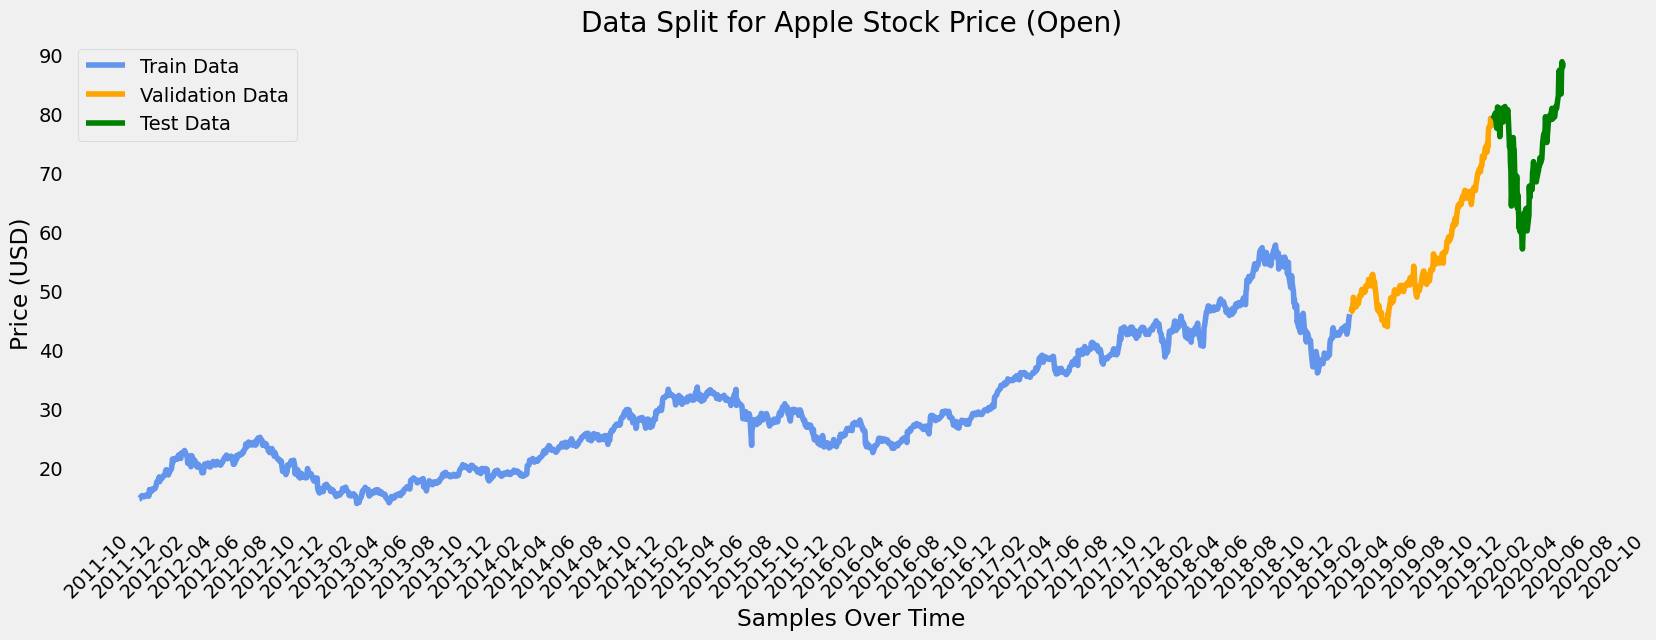

In [33]:
# Trace "stock prices" pour chaque dataset
plt.figure(figsize=(18, 6))
plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue")
plt.plot(data_validate_dates, data_validate["Open"], color="orange")
plt.plot(data_test_dates, data_test["Open"], color="green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for Apple Stock Price (Open)")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()
plt.show()

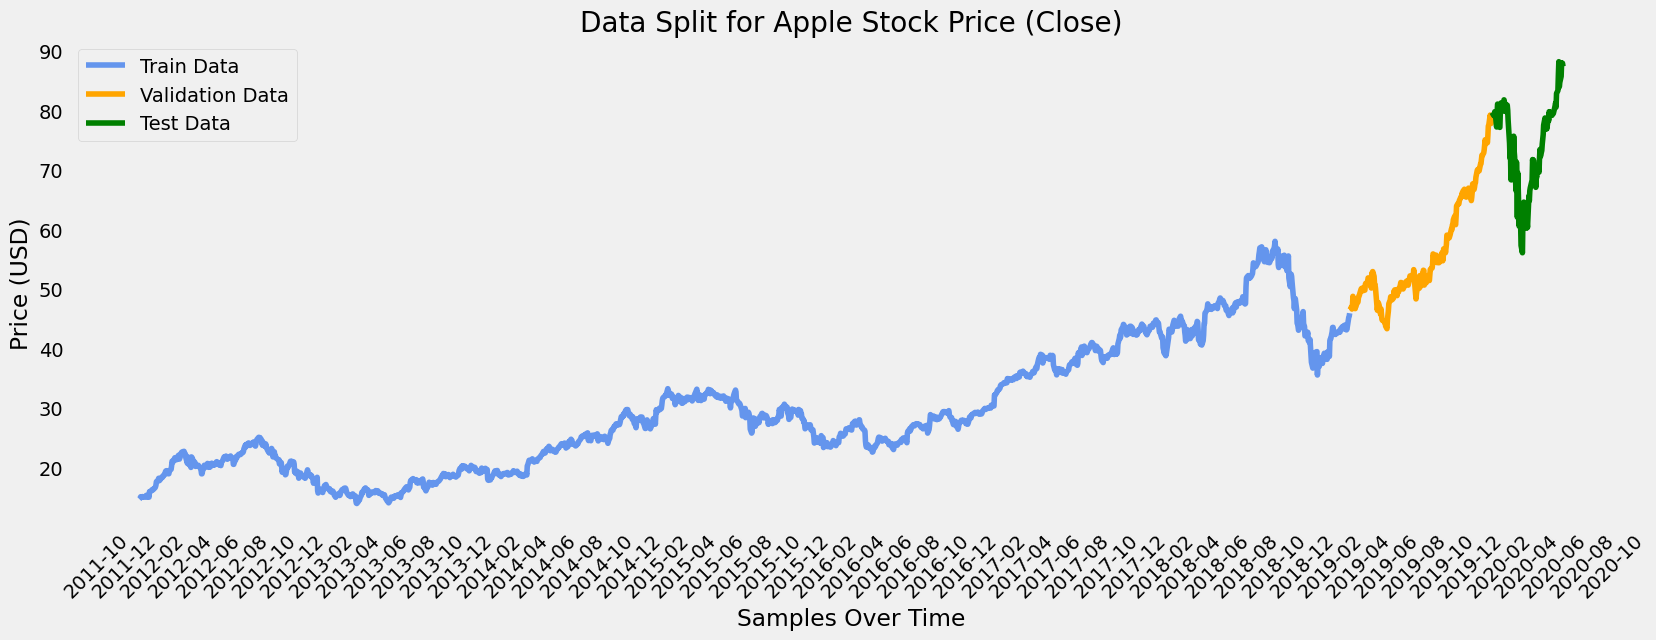

In [34]:
# Trace "stock prices" pour chaque dataset
plt.figure(figsize=(18, 6))
plt.plot(data_train_dates, data_train["Close"], color="cornflowerblue")
plt.plot(data_validate_dates, data_validate["Close"], color="orange")
plt.plot(data_test_dates, data_test["Close"], color="green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for Apple Stock Price (Close)")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Modeling

### LR

In [68]:
# Définir les indices de séparation pour chaque ensemble
n_obs = len(df)
train_size = int(n_obs * 0.85)

# Diviser le dataset en ensembles d'entraînement, de validation et de test
data_train = df.iloc[:train_size][features]
data_test = df.iloc[train_size:][features]

In [69]:
# Defining the Linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
X_train = np.array(data_train.drop(['Close'], axis = 1))
X_test = np.array(data_test.drop(['Close'], axis = 1))

y_train = np.array(data_train['Close'])
y_test = np.array(data_test['Close'])

<ipython-input-69-cc1f7ea19d95>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_train = np.array(data_train.drop(['Close'], axis = 1))
<ipython-input-69-cc1f7ea19d95>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_test = np.array(data_test.drop(['Close'], axis = 1))


In [70]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Score of the Linear Regression Model (Using the Test Data)

linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)

Linear Model score: 0.9984480743770382


In [71]:
# Define the Real & Prediction Values

X_predict = np.array(data_test.drop(['Close'], axis = 1))

linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(data_test.drop(['Close'], axis = 1)))


<ipython-input-71-4cefcaa29a9a>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_predict = np.array(data_test.drop(['Close'], axis = 1))
<ipython-input-71-4cefcaa29a9a>:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  linear_model_real_prediction = linear_model.predict(np.array(data_test.drop(['Close'], axis = 1)))


In [78]:
# Définir les paramètres

from datetime import timedelta

predicted_dates = []
recent_date = df.index.max()
display_at = 320
alpha = 0.5

predict_days = n_obs - train_size

# Génération des dates prédites
for i in range(predict_days):
    recent_date += timedelta(days=1)  # Ajout du timedelta sans conversion en chaîne
    predicted_dates.append(recent_date)

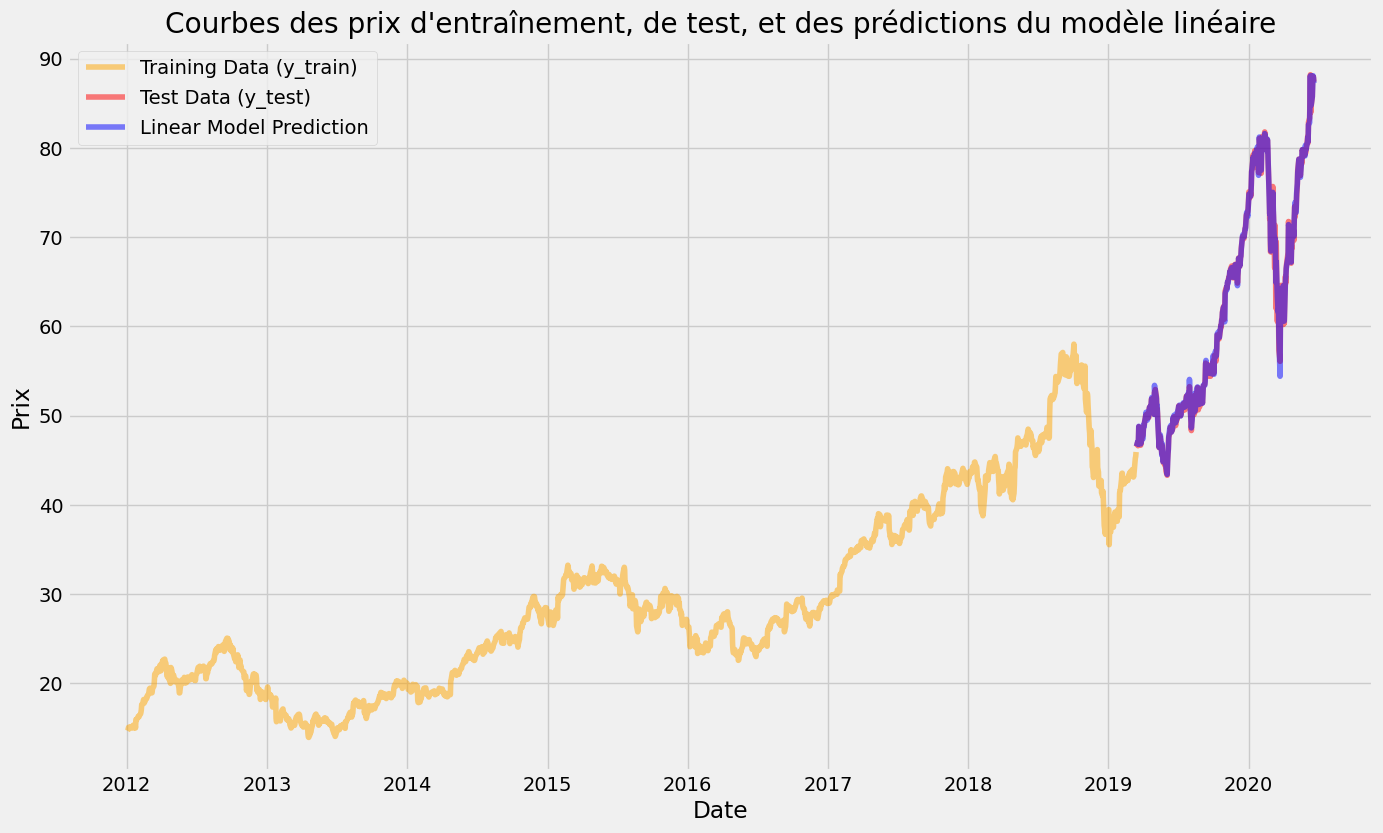

In [84]:
# Tracer les courbes des prix réels et prédits
plt.figure(figsize=(15, 9))

# Courbe pour les valeurs d'entraînement (y_train)
plt.plot(df.index[:train_size], y_train, label='Training Data (y_train)', color='orange', alpha=alpha)

# Courbe pour les valeurs de test (y_test)
plt.plot(df.index[train_size:], y_test, label='Test Data (y_test)', color='red', alpha=alpha)

# Courbe pour les prédictions (linear_model_real_prediction)
plt.plot(df.index[train_size:], linear_model_real_prediction, label='Linear Model Prediction', color='blue', alpha=alpha)

# Ajouter une légende et afficher le graphique
plt.legend()
plt.title("Courbes des prix d'entraînement, de test, et des prédictions du modèle linéaire")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.show()



### LSTM

In [122]:
# Vérifier que la colonne 'Close' existe dans df
print(df.columns)

# Créer un nouveau DataFrame avec uniquement la colonne 'Close'
data = df[['Close']]
print(data.head())  # Vérifier les premières lignes de data pour confirmer que 'Close' est présent

# Convertir le DataFrame en un tableau numpy
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

# Vérifier la forme du tableau numpy
print(dataset.shape)  # Devrait afficher (n, 1) où n est le nombre de lignes

# Vérifier que dataset n'est pas vide avant le scaling
if dataset.size > 0:
    # Effectuer le scaling
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    print(scaled_data[:5])  # Afficher les premières valeurs de scaled_data pour vérifier le scaling
else:
    print("Le dataset est vide ou ne contient pas de données dans la colonne 'Close'.")


MultiIndex([(  'Adj Close', 'AAPL'),
            (      'Close', 'AAPL'),
            (       'High', 'AAPL'),
            (        'Low', 'AAPL'),
            (       'Open', 'AAPL'),
            (     'Volume', 'AAPL'),
            ('Close_shift',     ''),
            ( 'Prediction',     '')],
           names=['Price', 'Ticker'])
Price                          Close
Ticker                          AAPL
Date                                
2012-01-03 00:00:00+00:00  14.686786
2012-01-04 00:00:00+00:00  14.765714
2012-01-05 00:00:00+00:00  14.929643
2012-01-06 00:00:00+00:00  15.085714
2012-01-09 00:00:00+00:00  15.061786
(2130, 1)
[[0.00995503]
 [0.01101786]
 [0.01322528]
 [0.0153269 ]
 [0.01500469]]


In [123]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00995503, 0.01101786, 0.01322528, 0.0153269 , 0.01500469,
       0.01573087, 0.01539904, 0.01484117, 0.01408131, 0.01643302,
       0.01855388, 0.01789982, 0.01431696, 0.01773631, 0.01436987,
       0.02699401, 0.02601775, 0.02729218, 0.03004785, 0.03171663,
       0.03157717, 0.03106259, 0.03325558, 0.03531872, 0.037656  ,
       0.04143122, 0.04936158, 0.04948181, 0.05389666, 0.05719575,
       0.05152573, 0.05370909, 0.05366581, 0.05978792, 0.05891744,
       0.06052852, 0.06342365, 0.06503475, 0.06967562, 0.07305647,
       0.07403274, 0.07437421, 0.06859356, 0.06719888, 0.06740568,
       0.07284008, 0.0743694 , 0.07765409, 0.08539688, 0.09572703,
       0.09379373, 0.09379853, 0.10126722, 0.10360451, 0.1019405 ,
       0.10042081, 0.09883858, 0.10409502, 0.10770193, 0.10921202])]
[0.10548007307678448]

[array([0.00995503, 0.01101786, 0.01322528, 0.0153269 , 0.01500469,
       0.01573087, 0.01539904, 0.01484117, 0.01408131, 0.01643302,
       0.01855388, 0.01789982, 0.01

In [124]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1644, 60, 1)

In [125]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [126]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1644/1644 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - loss: 0.0011


In [127]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [128]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step


In [129]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.3485134414744238

<ipython-input-130-c4aee32f125a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


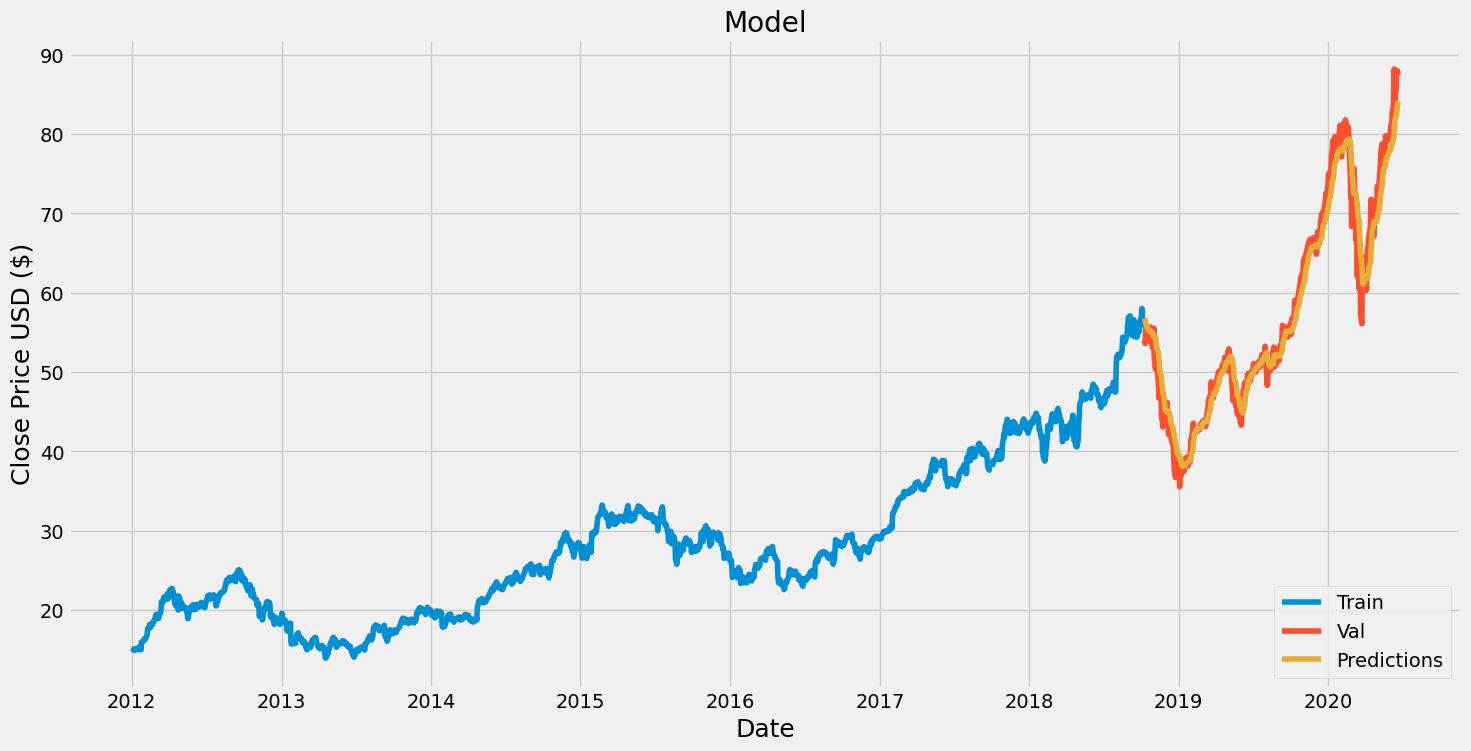

In [130]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### ARMA

In [35]:
 # Séparer les données en fonction des ensembles fournis
train_close = data_train["Close"]
validate_close = data_validate["Close"]
test_close = data_test["Close"]

mod = sm.tsa.statespace.SARIMAX(train_close,
                                  order=(1, 1, 2),
                                  seasonal_order=(0,1,1,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
# Fit the model
results = mod.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 AAPL   No. Observations:                 1810
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1303.274
Date:                              Thu, 31 Oct 2024   AIC                           2616.549
Time:                                      20:23:18   BIC                           2643.976
Sample:                                           0   HQIC                          2626.679
                                             - 1810                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1962      0.319      0.614      0.539      -0.430       0.822
ma.L1         -0.17

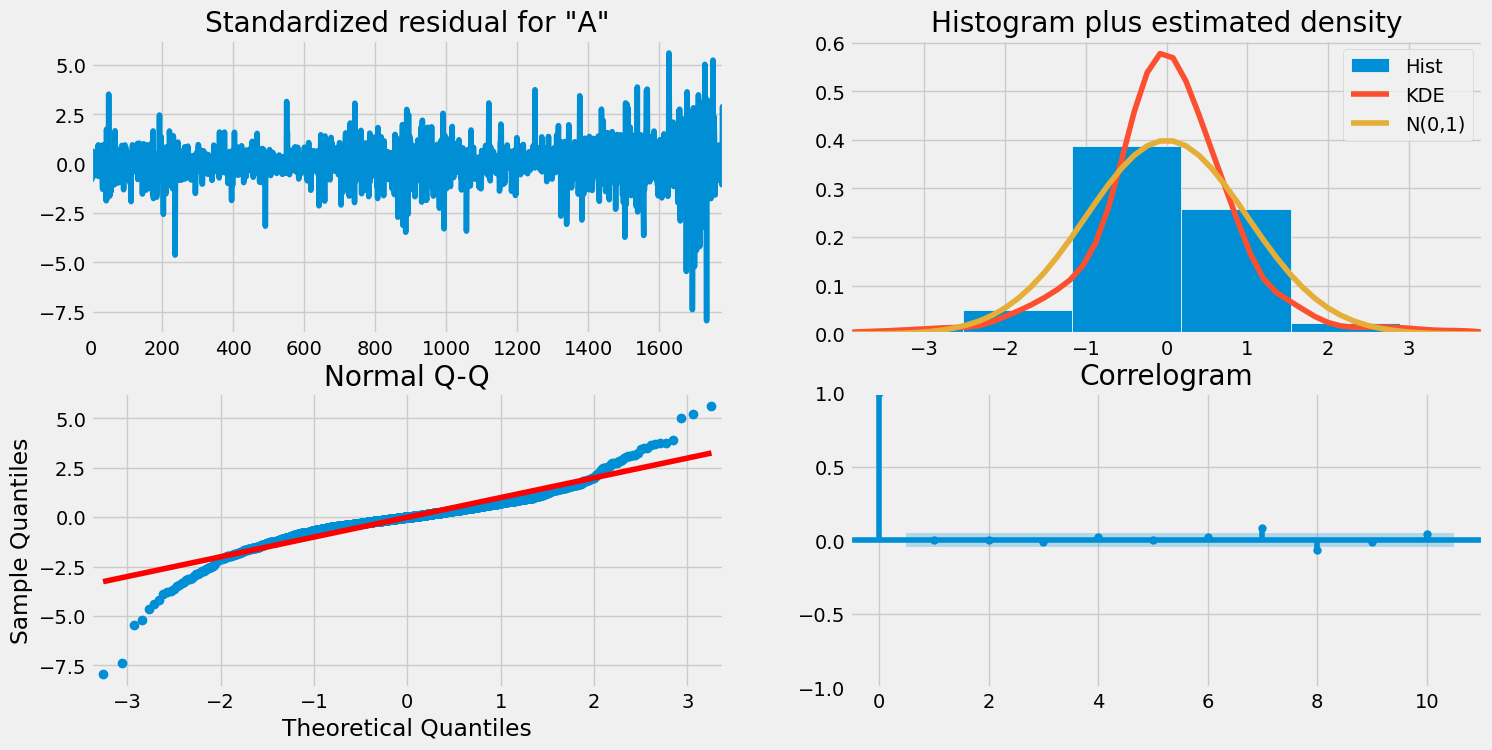

In [37]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()